In [2]:
import pickle

pickle.load(open( "out\\nnUNet_preprocessed\Task027_ACDC\\nnUNetPlansv2.1_plans_2D.pkl", "rb" ))

{'num_stages': 1,
 'num_modalities': 1,
 'modalities': {0: 'MRI'},
 'normalization_schemes': OrderedDict([(0, 'nonCT')]),
 'dataset_properties': {'all_sizes': [(10, 256, 216),
   (10, 256, 216),
   (10, 256, 231),
   (10, 256, 231),
   (10, 255, 256),
   (10, 255, 256),
   (10, 256, 232),
   (10, 256, 232),
   (10, 216, 255),
   (10, 216, 255),
   (11, 256, 231),
   (11, 256, 231),
   (10, 223, 222),
   (10, 223, 222),
   (10, 256, 199),
   (10, 256, 199),
   (10, 256, 208),
   (10, 256, 208),
   (10, 256, 208),
   (10, 256, 208),
   (9, 256, 216),
   (9, 256, 216),
   (10, 256, 184),
   (10, 256, 184),
   (10, 256, 216),
   (10, 256, 216),
   (10, 216, 256),
   (10, 216, 256),
   (9, 216, 256),
   (9, 216, 256),
   (10, 256, 192),
   (10, 256, 192),
   (9, 256, 216),
   (9, 256, 216),
   (8, 256, 216),
   (8, 256, 216),
   (11, 256, 216),
   (11, 256, 216),
   (8, 256, 208),
   (8, 256, 208),
   (10, 255, 240),
   (10, 255, 240),
   (7, 256, 200),
   (7, 256, 200),
   (9, 256, 216),
 

256
[0. 1. 2. 3. 4.]
[[0 85 170]
 [0 85 170]
 [0 85 170]]
[[[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]

 [[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]

 [[0.         0.         0.         1.        ]
  [0.         0.83333333 1.         1.        ]
  [1.         0.90123457 0.         1.        ]]]


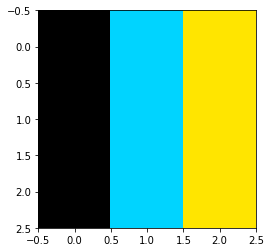

In [17]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt

a = np.array([[0., 1, 2], [0., 1, 2], [0., 1, 2]])

cmap = cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
print(len(cmaplist))

cmaplist[0] = (0, 0, 0, 1.0)

# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0, 4, 5)
print(bounds)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
print(norm(a))
a_new = cmap(norm(a))
print(norm)
print(a_new)

plt.imshow(a_new)

In [3]:
import numpy as np
from glob import glob

for path in glob("C:\\Users\\Portal\\Documents\\Isensee\\nnUNet\\nnunet\out\\nnUNet_preprocessed\\Task027_ACDC\\custom_experiment_planner_stage0\\*.npz"):
    data = np.load(path)
    out = data['data']
    for i in range(out.shape[1]):
        print(out[0, i].std())

0.92798585
0.91713876
0.95974994
0.9584918
0.93643355
0.97288704
1.0303932
1.0517923
1.0711823
1.1467957
0.9942191
0.92671746
0.93690264
0.94063795
0.92311704
0.9534063
1.0197469
1.0469383
1.0733124
1.1542068
0.95917875
0.9830986
0.96091884
0.98083395
0.98704433
0.99414706
0.99359107
0.9971958
1.0214547
1.1112697
0.9711587
0.9726262
0.9500751
0.97286546
0.981317
0.99257904
0.9917063
1.000038
1.0298485
1.1229929
0.87698275
0.9274327
0.95239913
1.0164367
1.0930488
1.085254
1.05582
1.0303789
0.98423415
0.9299033
0.8895261
0.925326
0.94466877
1.0089716
1.0897287
1.0910537
1.0572209
1.0298367
0.98410195
0.93309635
0.88483953
0.8928908
0.89809865
0.9465352
0.95906496
0.96892554
1.0127159
1.0591073
1.1033566
1.1368318
0.87292856
0.88232374
0.88281745
0.9285825
0.9470049
0.9635643
1.0463682
1.0729483
1.1045088
1.1413611
1.0370193
1.1070564
1.0864106
1.073592
1.0364084
0.9951949
0.9420029
0.93015665
0.84654886
0.77998847
1.0243105
1.087091
1.0668609
1.0679008
1.0341301
0.9976618
0.9509323
0.934

In [5]:
%matplotlib qt

import nibabel as nib
import matplotlib.pyplot as plt
import torch

data = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesTr\\patient001_frame01_0000.nii.gz')
gata_gt = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\patient001_frame01.nii.gz')
arr = data.get_fdata()
arr_gt = gata_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

arr = torch.from_numpy(arr)
arr_gt = torch.from_numpy(arr_gt)

f = torch.fft.fft2(arr[:, :, 1])
f_gt = torch.fft.fft2(arr_gt[:, :, 1])

fig, ax = plt.subplots(3, 2)
ax[0, 0].imshow(arr[:, :, 1], cmap='gray')
ax[0, 1].imshow(arr_gt[:, :, 1], cmap='gray')
ax[1, 0].imshow(torch.log(torch.fft.fftshift(f.abs())), cmap='gray')
ax[1, 1].imshow(torch.log(torch.fft.fftshift(f_gt.abs())), cmap='gray')
ax[2, 0].imshow(torch.fft.fftshift(f.angle()), cmap='gray')
ax[2, 1].imshow(torch.fft.fftshift(f_gt.angle()), cmap='gray')
plt.show()

(216, 256, 10)
(216, 256, 10)


In [7]:
%matplotlib qt

import nibabel as nib
import matplotlib.pyplot as plt
import torch

data = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\imagesTr\\patient001_frame01_0000.nii.gz')
gata_gt = nib.load('out\\nnUNet_raw_data_base\\nnUNet_raw_data\\Task027_ACDC\\labelsTr\\patient001_frame01.nii.gz')
arr = data.get_fdata()
arr_gt = gata_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

arr = torch.from_numpy(arr)
arr_gt = torch.from_numpy(arr_gt)

f = torch.fft.fftshift(torch.fft.fft2(arr[:, :, 1]))
f_gt = torch.fft.fftshift(torch.fft.fft2(arr_gt[:, :, 1]))

cy = f.shape[0] / 2
cx = f.shape[1] / 2

f[int(cy - (cy * 0.5)):int(cy + (cy * 0.5)), int(cx - (cx * 0.5)):int(cx + (cx * 0.5))] = 0
f_gt[int(cy - (cy * 0.5)):int(cy + (cy * 0.5)), int(cx - (cx * 0.5)):int(cx + (cx * 0.5))] = 0

f = torch.fft.ifftshift(f)
f_gt = torch.fft.ifftshift(f_gt)

f_after = torch.fft.ifft2(f)
f_gt_after = torch.fft.ifft2(f_gt)

fig, ax = plt.subplots(2, 2)
ax[0, 0].imshow(arr[:, :, 1], cmap='gray')
ax[0, 1].imshow(arr_gt[:, :, 1], cmap='gray')
ax[1, 0].imshow(f_after.real, cmap='gray')
ax[1, 1].imshow(f_gt_after.real, cmap='gray')
plt.show()

(216, 256, 10)
(216, 256, 10)


(216, 304, 8)
(216, 304, 8)


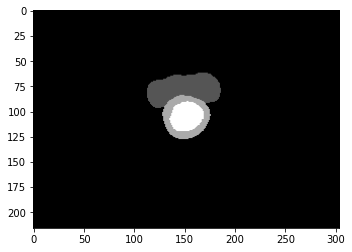

In [5]:
import nibabel as nib
import matplotlib.pyplot as plt

data = nib.load('patient100_frame01_pred.nii.gz')
data_gt = nib.load('patient100_frame01_gt_raw.nii.gz')
arr = data.get_fdata()
arr_gt = data_gt.get_fdata()
print(arr.shape)
print(arr_gt.shape)

fig, ax = plt.subplots(1, 1)
ax.imshow(arr[:, :, 1], cmap='gray')
plt.show()

(512, 512)


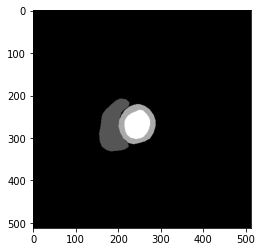

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('data_ok\RACINE\RACINE_AV04049_20140528\RACINE_AV04049_20140528_Slice_05_phase_02.npz')
print(data['arr_0'].shape)
plt.imshow(data['arr_1'], cmap='gray')

In [5]:
import nibabel as nib

data = nib.load('ACDC_training\patient001\patient001_frame01.nii.gz')
arr = data.get_fdata()
print(arr.shape)

(216, 256, 10)


In [1]:
from pathlib import Path
import shutil
from glob import glob
import os
import numpy as np
from tqdm import tqdm
import nibabel as nib

def get_slice_numbers(path_list):
    slice_number_list = []
    for path in path_list:
        slice_nb = path.split('Slice')[-1].split('_')[1]
        slice_number_list.append(slice_nb)
    return list(set(slice_number_list))

def delete_if_exist(folder_name):
    dirpath = Path(folder_name)
    if dirpath.exists() and dirpath.is_dir():
        shutil.rmtree(dirpath)

new_folder_name = 'custom_lib'

delete_if_exist(new_folder_name)

Path(new_folder_name).mkdir(parents=True, exist_ok=True)

for i, patient in enumerate(tqdm(glob('data_ok/*/*'))):
    patient_string = ('patient' + str(i + 1).zfill(3))
    patient_folder_name = os.path.join(new_folder_name, patient_string)
    delete_if_exist(patient_folder_name)
    Path(patient_folder_name).mkdir(parents=True, exist_ok=True)
    all_patient_files = glob(os.path.join(patient, '*'))
    slice_nb_list = get_slice_numbers(all_patient_files)
    for slice_nb in slice_nb_list:
        gt_list = []
        image_list = []
        for patient_file in all_patient_files:
            if slice_nb not in patient_file:
                continue
            else:
                data = np.load(patient_file)
                image_list.append(data['arr_0'])
                gt_list.append(data['arr_1'])
        image_list = np.stack(image_list, axis=2)
        gt_list = np.stack(gt_list, axis=2)
        nib.save(nib.Nifti1Image(image_list, affine=np.eye(4)), os.path.join(patient_folder_name, patient_string + '_frame' + slice_nb + '.nii.gz'))  
        nib.save(nib.Nifti1Image(gt_list, affine=np.eye(4)), os.path.join(patient_folder_name, patient_string + '_frame' + slice_nb + '_gt.nii.gz'))  


100%|██████████| 206/206 [10:09<00:00,  2.96s/it]
